In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

In [2]:
# download from https://evictionlab.org/get-the-data/
# Choose VA => choose "all.csv" (Change the file name to 'VA.csv')
# Choose VA => choose "cities.csv" (Change the file name to 'cities_VA.csv')
df = pd.read_csv('block-groups_VA.csv')

In [3]:
df_clean = df.dropna(axis=0, how='any')

In [4]:
df_clean = df_clean[df_clean['eviction-rate']<100]

In [5]:
HighRankCity = ['Richmond city, Virginia', 'Hampton city, Virginia', 'Newport News city, Virginia', 'Norfolk city, Virginia', 'Chesapeake city, Virginia']

In [6]:
df_clean.columns

Index(['GEOID', 'year', 'name', 'parent-location', 'population',
       'poverty-rate', 'pct-renter-occupied', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian',
       'pct-nh-pi', 'pct-multiple', 'pct-other', 'renter-occupied-households',
       'eviction-filings', 'evictions', 'eviction-rate',
       'eviction-filing-rate', 'imputed', 'subbed'],
      dtype='object')

In [7]:
# df_city=df_clean[(df_clean['name']==HighRankCity[0]) | (df_clean['name']==HighRankCity[1]) | (df_clean['name']==HighRankCity[2]) | (df_clean['name']==HighRankCity[3]) | (df_clean['name']==HighRankCity[4])]

In [8]:
df_city=df_clean[df_clean['parent-location']==HighRankCity[2]]   # Analyze 'Richmond city, Virginia' first

df_city.shape


(1563, 26)

In [9]:
df_city_2016=df_clean[(df_clean['parent-location']==HighRankCity[2]) & (df_clean['year']==2016)]

df_city_2016.shape

(99, 26)

In [10]:
df_city_2016

,GEOID,year,name,parent-location,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,pct-nh-pi,pct-multiple,pct-other,renter-occupied-households,eviction-filings,evictions,eviction-rate,eviction-filing-rate,imputed,subbed
83311,517000303001,2016,303.1,"Newport News city, Virginia",689.0,13.02,22.96,825.0,40938.0,176500.0,...,0.00,0.00,0.00,144.0,44.0,21.0,14.58,30.56,0,0
83312,517000303002,2016,303.2,"Newport News city, Virginia",1132.0,12.23,13.25,1193.0,42917.0,94000.0,...,0.00,1.06,0.00,157.0,77.0,53.0,33.76,49.04,0,0
83313,517000303003,2016,303.3,"Newport News city, Virginia",666.0,11.72,48.31,809.0,29575.0,110600.0,...,0.00,0.00,0.00,113.0,43.0,26.0,23.01,38.05,0,0
83314,517000303004,2016,303.4,"Newport News city, Virginia",1040.0,31.45,62.20,542.0,25172.0,121300.0,...,0.00,1.44,0.00,268.0,47.0,17.0,6.34,17.54,0,0
83315,517000303005,2016,303.5,"Newport News city, Virginia",500.0,11.61,46.97,1204.0,30375.0,120200.0,...,0.00,0.00,0.00,98.0,29.0,17.0,17.35,29.59,0,0
83316,517000303006,2016,303.6,"Newport News city, Virginia",1074.0,54.71,76.42,607.0,16700.0,166800.0,...,0.00,0.00,0.00,361.0,65.0,24.0,6.65,18.01,0,0
83317,517000303007,2016,303.7,"Newport News city, Virginia",489.0,0.00,40.00,1688.0,44688.0,128400.0,...,0.00,0.00,0.00,101.0,31.0,13.0,12.87,30.69,0,0
83318,517000304001,2016,304.1,"Newport News city, Virginia",855.0,38.24,74.48,647.0,16620.0,134700.0,...,0.00,0.00,0.00,282.0,263.0,74.0,26.24,93.26,0,0
83319,517000304002,2016,304.2,"Newport News city, Virginia",939.0,47.25,60.65,749.0,22667.0,121300.0,...,0.53,3.73,0.00,162.0,94.0,40.0,24.69,58.02,0,0
83320,517000304003,2016,304.3,"Newport News city, Virginia",1052.0,51.89,73.94,483.0,17292.0,114800.0,...,0.00,0.76,0.00,267.0,54.0,35.0,13.11,20.22,0,0


# Analyze Newport News city, Virginia in 2016

In [11]:
X = df_city_2016.drop(['GEOID','year','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate'],axis=1)
y = df_city_2016['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=100)

rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

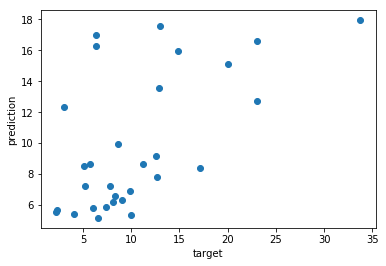

In [12]:
plt.scatter(y_test,predictions)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round( min( min(y_test), min(predictions) ) )
ymax = np.ceil( max( max(y_test), max(predictions) ) )

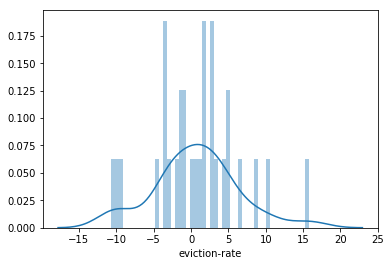

In [13]:
sns.distplot((y_test-predictions),bins=50);

In [14]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.9281607861
Test set score: 0.3353792046
MAE: 4.29145333333
MSE: 32.0173461953
RMSE: 5.65838724332


Feature ranking:
1. feature 8 (pct-af-am) (0.334018)
2. feature 7 (pct-white) (0.224741)
3. feature 9 (pct-hispanic) (0.094943)
4. feature 5 (median-property-value) (0.090847)
5. feature 1 (poverty-rate) (0.048401)
6. feature 4 (median-household-income) (0.043489)
7. feature 6 (rent-burden) (0.035661)
8. feature 0 (population) (0.029127)
9. feature 11 (pct-asian) (0.023432)
10. feature 3 (median-gross-rent) (0.021912)
11. feature 2 (pct-renter-occupied) (0.017896)
12. feature 15 (renter-occupied-households) (0.016065)
13. feature 13 (pct-multiple) (0.015261)
14. feature 10 (pct-am-ind) (0.002926)
15. feature 14 (pct-other) (0.000708)
16. feature 12 (pct-nh-pi) (0.000574)


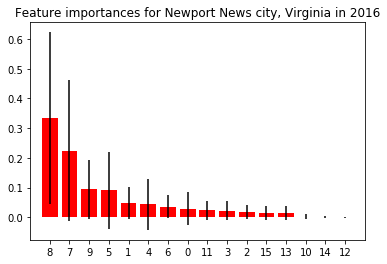

In [15]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Newport News city, Virginia in 2016")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [16]:
ds_importances = pd.Series(importances, name='importances')
ds_std = pd.Series(std, name='std')
ds_columns = pd.Series(X.columns,name='features')
Results = pd.concat([ds_importances, ds_std,ds_columns], axis=1)
Results.to_csv('Result_VA_NewportNewsCity_2016_rf_all.csv')

In [17]:
# do a quick baseline test
baseline = LinearRegression()
single_tree = DecisionTreeRegressor()
print("CV single tree:", cross_val_score(single_tree, X_train, y_train).mean())
print("CV baseline:", cross_val_score(baseline,X_train, y_train).mean())
print("CV forest:", cross_val_score(rfc, X_train, y_train).mean())

CV single tree: 0.125890774107
CV baseline: 0.131380831632
CV forest: 0.370812478586


In [18]:
# test score
single_tree.fit(X_train, y_train)
baseline.fit(X_train, y_train)
print("test score single tree:", single_tree.score(X_test, y_test))
print("test score baseline:", baseline.score(X_test, y_test))
print("test score forest:", rfc.score(X_test, y_test))

test score single tree: 0.0373133698385
test score baseline: 0.276246336841
test score forest: 0.335379204631


# Use pct-af-am race only

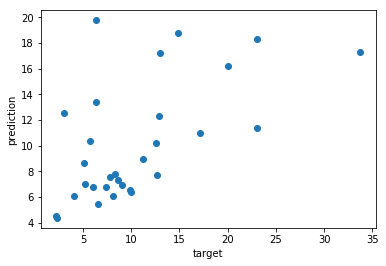

In [19]:
X = df_city_2016.drop(['GEOID','year','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households','pct-nh-pi','pct-other','pct-am-ind','pct-white','population','pct-hispanic','pct-multiple','pct-asian'],axis=1)
y = df_city_2016['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round( min( min(y_test), min(predictions) ) )
ymax = np.ceil( max( max(y_test), max(predictions) ) )

In [20]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.9012509511
Test set score: 0.3379594153
MAE: 4.10288
MSE: 31.8930475
RMSE: 5.64739298261


Feature ranking:
1. feature 6 (pct-af-am) (0.544983)
2. feature 4 (median-property-value) (0.149777)
3. feature 0 (poverty-rate) (0.086896)
4. feature 3 (median-household-income) (0.077852)
5. feature 5 (rent-burden) (0.055301)
6. feature 2 (median-gross-rent) (0.052439)
7. feature 1 (pct-renter-occupied) (0.032751)


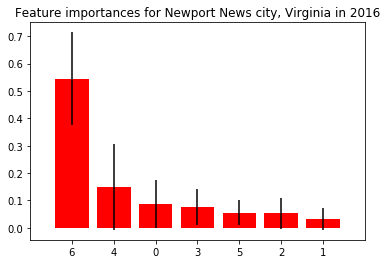

In [21]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Newport News city, Virginia in 2016")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [22]:
ds_importances = pd.Series(importances, name='importances')
ds_std = pd.Series(std, name='std')
ds_columns = pd.Series(X.columns,name='features')
Results = pd.concat([ds_importances, ds_std,ds_columns], axis=1)
Results.to_csv('Result_VA_HNewportNewsCity_2016_rf_pct-af-am.csv')

# Analyze Newport News city, Virginia all 2000-2016 years

In [23]:
X = df_city.drop(['GEOID','year','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate'],axis=1)
y = df_city['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=100)

rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

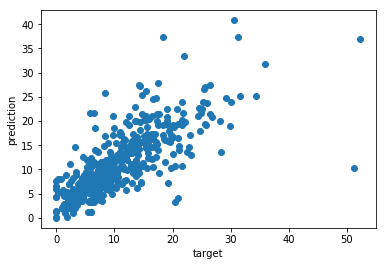

In [24]:
plt.scatter(y_test,predictions)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round( min( min(y_test), min(predictions) ) )
ymax = np.ceil( max( max(y_test), max(predictions) ) )

In [25]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.9201466180
Test set score: 0.5611886606
MAE: 3.27207856764
MSE: 23.6540149138
RMSE: 4.86353934021


Feature ranking:
1. feature 7 (pct-white) (0.245269)
2. feature 15 (renter-occupied-households) (0.153178)
3. feature 8 (pct-af-am) (0.108548)
4. feature 1 (poverty-rate) (0.071875)
5. feature 6 (rent-burden) (0.050708)
6. feature 0 (population) (0.047554)
7. feature 4 (median-household-income) (0.047438)
8. feature 3 (median-gross-rent) (0.044798)
9. feature 13 (pct-multiple) (0.039937)
10. feature 5 (median-property-value) (0.038803)
11. feature 2 (pct-renter-occupied) (0.035936)
12. feature 9 (pct-hispanic) (0.031273)
13. feature 11 (pct-asian) (0.026968)
14. feature 10 (pct-am-ind) (0.026786)
15. feature 12 (pct-nh-pi) (0.017582)
16. feature 14 (pct-other) (0.013348)


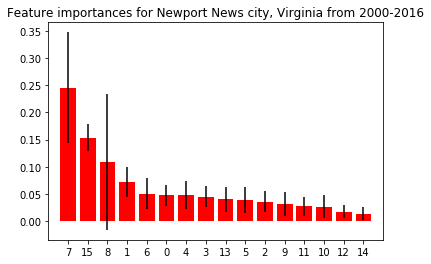

In [26]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Newport News city, Virginia from 2000-2016")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [27]:
ds_importances = pd.Series(importances, name='importances')
ds_std = pd.Series(std, name='std')
ds_columns = pd.Series(X.columns,name='features')
Results = pd.concat([ds_importances, ds_std,ds_columns], axis=1)
Results.to_csv('Result_VA_NewportNewsCity_years_all.csv')

# Use pct-af-am race only

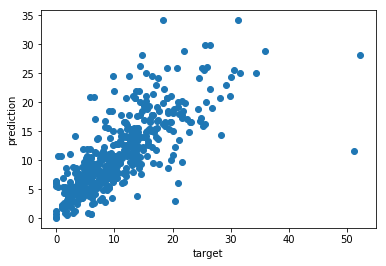

In [28]:
# Use pct-af-am race only
X = df_city.drop(['GEOID','year','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households','pct-nh-pi','pct-other','pct-am-ind','pct-white','population','pct-hispanic','pct-multiple','pct-asian'],axis=1)
y = df_city['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round( min( min(y_test), min(predictions) ) )
ymax = np.ceil( max( max(y_test), max(predictions) ) )

In [29]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.7774883346
Test set score: 0.5621301226
MAE: 3.34817850377
MSE: 23.6032656394
RMSE: 4.85831921959


Feature ranking:
1. feature 6 (pct-af-am) (0.423468)
2. feature 0 (poverty-rate) (0.114435)
3. feature 5 (rent-burden) (0.099944)
4. feature 4 (median-property-value) (0.098859)
5. feature 3 (median-household-income) (0.095017)
6. feature 2 (median-gross-rent) (0.087098)
7. feature 1 (pct-renter-occupied) (0.081180)


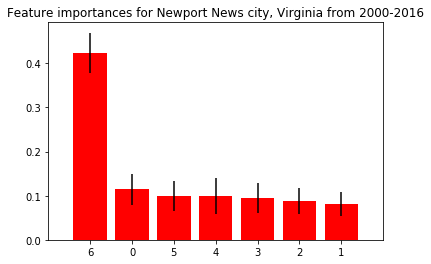

In [30]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Newport News city, Virginia from 2000-2016")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [31]:
ds_importances = pd.Series(importances, name='importances')
ds_std = pd.Series(std, name='std')
ds_columns = pd.Series(X.columns,name='features')
Results = pd.concat([ds_importances, ds_std,ds_columns], axis=1)
Results.to_csv('Result_VA_NewportNewsCity_years_rf_pct-af-am.csv')

In [32]:
# do a quick baseline test
baseline = LinearRegression()
single_tree = DecisionTreeRegressor()
print("CV single tree:", cross_val_score(single_tree, X_train, y_train).mean())
print("CV baseline:", cross_val_score(baseline,X_train, y_train).mean())
print("CV forest:", cross_val_score(rfc, X_train, y_train).mean())

CV single tree: 0.238601669997
CV baseline: 0.249792161501
CV forest: 0.427139781846


In [33]:
# test score
single_tree.fit(X_train, y_train)
baseline.fit(X_train, y_train)
print("test score single tree:", single_tree.score(X_test, y_test))
print("test score baseline:", baseline.score(X_test, y_test))
print("test score forest:", rfc.score(X_test, y_test))

test score single tree: 0.404581809061
test score baseline: 0.324634478413
test score forest: 0.562130122641


# Use pct-white only

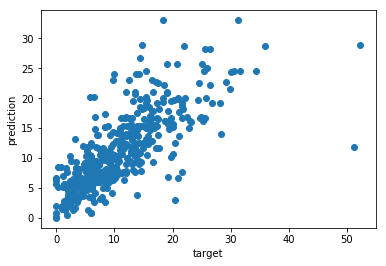

In [34]:
X = df_city.drop(['GEOID','year','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households','pct-nh-pi','pct-other','pct-am-ind','pct-af-am','population','pct-hispanic','pct-multiple','pct-asian'],axis=1)
y = df_city['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round( min( min(y_test), min(predictions) ) )
ymax = np.ceil( max( max(y_test), max(predictions) ) )

In [35]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.7780887648
Test set score: 0.5716131981
MAE: 3.27975531563
MSE: 23.0920828419
RMSE: 4.80542223346


# Use both pct-white and pct-af-am

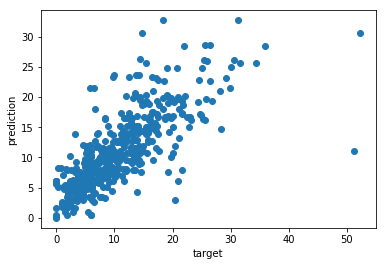

In [36]:
X = df_city.drop(['GEOID','year','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households','pct-nh-pi','pct-other','pct-am-ind','population','pct-hispanic','pct-multiple','pct-asian'],axis=1)
y = df_city['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round( min( min(y_test), min(predictions) ) )
ymax = np.ceil( max( max(y_test), max(predictions) ) )

In [37]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.7770452899
Test set score: 0.5767935869
MAE: 3.26150922421
MSE: 22.8128352862
RMSE: 4.77627839287


Feature ranking:
1. feature 6 (pct-white) (0.299533)
2. feature 7 (pct-af-am) (0.180896)
3. feature 0 (poverty-rate) (0.100888)
4. feature 5 (rent-burden) (0.091337)
5. feature 3 (median-household-income) (0.088501)
6. feature 4 (median-property-value) (0.084890)
7. feature 2 (median-gross-rent) (0.077493)
8. feature 1 (pct-renter-occupied) (0.076462)


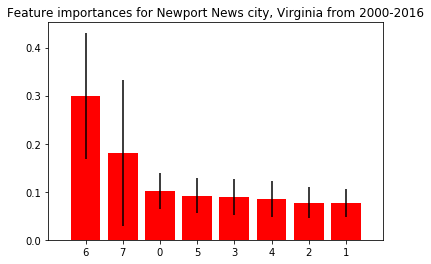

In [38]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Newport News city, Virginia from 2000-2016")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# use pct-hispanic only

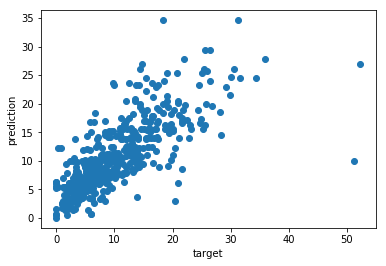

In [39]:
# Use pct-af-am race only
X = df_city.drop(['GEOID','year','name','parent-location','imputed','subbed','eviction-rate','eviction-filings','evictions','eviction-filing-rate',
                      'renter-occupied-households','pct-nh-pi','pct-other','pct-am-ind','pct-white','pct-af-am','population','pct-multiple','pct-asian'],axis=1)
y = df_city['eviction-rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round( min( min(y_test), min(predictions) ) )
ymax = np.ceil( max( max(y_test), max(predictions) ) )

In [40]:
print("Training set score: %.10f" % rfc.score(X_train, y_train))
print("Test set score: %.10f" % rfc.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Training set score: 0.7700944844
Test set score: 0.5518512056
MAE: 3.38585091409
MSE: 24.1573480806
RMSE: 4.9150125209


In [41]:
# do a quick baseline test
baseline = LinearRegression()
single_tree = DecisionTreeRegressor()
print("CV single tree:", cross_val_score(single_tree, X_train, y_train).mean())
print("CV baseline:", cross_val_score(baseline,X_train, y_train).mean())
print("CV forest:", cross_val_score(rfc, X_train, y_train).mean())

CV single tree: 0.214454620573
CV baseline: 0.166765851622
CV forest: 0.400334739476


Feature ranking:
1. feature 0 (poverty-rate) (0.306835)
2. feature 5 (rent-burden) (0.181158)
3. feature 3 (median-household-income) (0.121482)
4. feature 2 (median-gross-rent) (0.101627)
5. feature 4 (median-property-value) (0.097562)
6. feature 1 (pct-renter-occupied) (0.097492)
7. feature 6 (pct-hispanic) (0.093844)


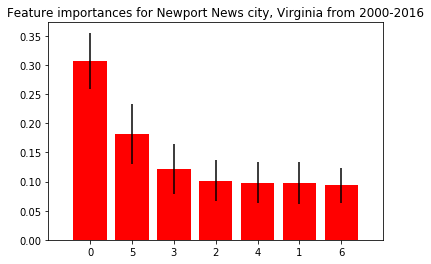

In [42]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1,indices[f], X.columns[indices[f]], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Newport News city, Virginia from 2000-2016")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [43]:
ds_importances = pd.Series(importances, name='importances')
ds_std = pd.Series(std, name='std')
ds_columns = pd.Series(X.columns,name='features')
Results = pd.concat([ds_importances, ds_std,ds_columns], axis=1)
Results.to_csv('Result_VA_NewportNewsCity_years_rf_pct-hispanic.csv')

In [44]:
by_year = df_city.groupby('year')

by_year.mean()

,GEOID,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,...,pct-nh-pi,pct-multiple,pct-other,renter-occupied-households,eviction-filings,evictions,eviction-rate,eviction-filing-rate,imputed,subbed
year,,,,,,,,,,,,,,,,,,,,,
2000,5.170003e+11,1411.483902,14.834065,48.311707,526.019756,31487.870407,74198.076423,23.834309,49.122195,42.024878,...,0.097805,2.177642,0.196992,265.276423,47.252033,26.422764,9.159350,15.832358,0.0,0.0
2001,5.170003e+11,1411.483902,14.834065,48.311707,526.019756,31487.870407,74198.076423,23.834309,49.122195,42.024878,...,0.097805,2.177642,0.196992,266.357724,50.317073,28.878049,10.178130,16.819431,0.0,0.0
2002,5.170003e+11,1411.483902,14.834065,48.311707,526.019756,31487.870407,74198.076423,23.834309,49.122195,42.024878,...,0.097805,2.177642,0.196992,267.471545,51.796748,29.081301,10.457561,17.863984,0.0,0.0
2003,5.170003e+11,1411.483902,14.834065,48.311707,526.019756,31487.870407,74198.076423,23.834309,49.122195,42.024878,...,0.097805,2.177642,0.196992,268.585366,61.723577,29.878049,10.623740,20.529512,0.0,0.0
2004,5.170003e+11,1411.483902,14.834065,48.311707,526.019756,31487.870407,74198.076423,23.834309,49.122195,42.024878,...,0.097805,2.177642,0.196992,269.634146,99.845528,24.552846,9.149268,32.253984,0.0,0.0
2005,5.170003e+11,1518.865203,3.080244,47.987317,709.503333,41282.136992,143481.988049,26.948699,45.466098,44.266992,...,0.103496,2.491382,0.243577,270.878049,108.349593,22.577236,8.124309,33.828211,0.0,0.0
2006,5.170003e+11,1518.865203,3.080244,47.987317,709.503333,41282.136992,143481.988049,26.948699,45.466098,44.266992,...,0.103496,2.491382,0.243577,271.821138,106.260163,22.894309,8.662683,33.506098,0.0,0.0
2010,5.170003e+11,1450.916667,12.661296,47.849259,1044.083333,51444.018519,188336.111111,32.587037,41.557037,45.114537,...,0.129630,3.287315,0.187870,288.157407,97.462963,41.425926,13.347685,29.282037,0.0,0.0
2011,5.170003e+11,1451.141414,13.176566,48.542929,1061.040404,49740.515152,174491.909091,32.903030,40.465758,45.854040,...,0.128283,3.266465,0.365455,292.161616,133.929293,41.606061,13.273333,39.017374,0.0,0.0


In [45]:
year1= np.array(range(2000,2007))
year2= np.array(range(2010,2017))
years = np.concatenate((year1, year2), axis=0)

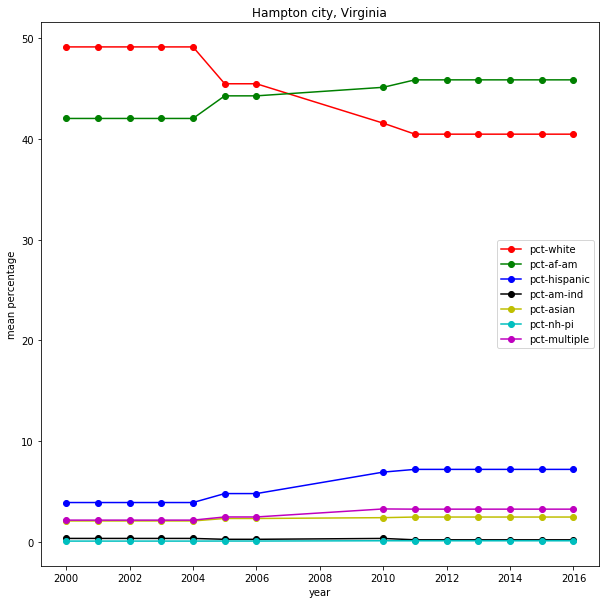

In [46]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
ax.plot(years,by_year.mean()['pct-white'].as_matrix(),'-ro',label = 'pct-white')
ax.plot(years,by_year.mean()['pct-af-am'].as_matrix(),'-go',label = 'pct-af-am')
ax.plot(years,by_year.mean()['pct-hispanic'].as_matrix(),'-bo',label = 'pct-hispanic')
ax.plot(years,by_year.mean()['pct-am-ind'].as_matrix(),'-ko',label = 'pct-am-ind')
ax.plot(years,by_year.mean()['pct-asian'].as_matrix(),'-yo',label = 'pct-asian')
ax.plot(years,by_year.mean()['pct-nh-pi'].as_matrix(),'-co',label = 'pct-nh-pi')
ax.plot(years,by_year.mean()['pct-multiple'].as_matrix(),'-mo',label = 'pct-multiple')
plt.legend(fontsize="xx-large")
plt.title('Hampton city, Virginia')
plt.xlabel("year")
plt.ylabel("mean percentage")
ax.legend()
plt.show()
fig.savefig('Fig_VA_NewportNewsCity_races.jpg')

Text(0,0.5,'mean eviction-rate')

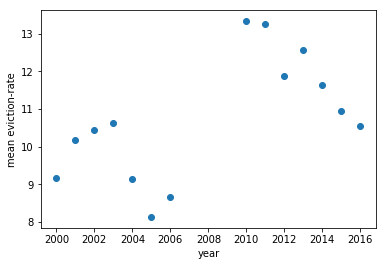

In [47]:
plt.scatter(years,by_year.mean()['eviction-rate'].as_matrix())
plt.xlabel("year")
plt.ylabel('mean eviction-rate')


In [48]:
by_year.mean().columns

Index(['GEOID', 'population', 'poverty-rate', 'pct-renter-occupied',
       'median-gross-rent', 'median-household-income', 'median-property-value',
       'rent-burden', 'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind',
       'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other',
       'renter-occupied-households', 'eviction-filings', 'evictions',
       'eviction-rate', 'eviction-filing-rate', 'imputed', 'subbed'],
      dtype='object')

Text(0,0.5,'mean rent-burden')

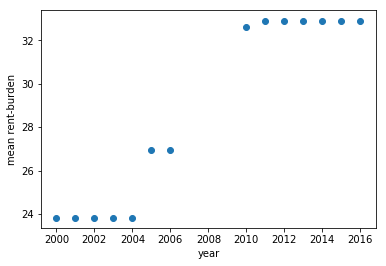

In [49]:
plt.scatter(years,by_year.mean()['rent-burden'].as_matrix())
plt.xlabel("year")
plt.ylabel('mean rent-burden')

Text(0,0.5,'mean median-household-income')

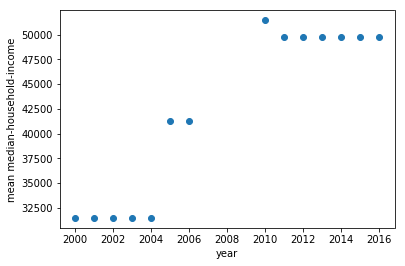

In [50]:
plt.scatter(years,by_year.mean()['median-household-income'].as_matrix())
plt.xlabel("year")
plt.ylabel('mean median-household-income')

Text(0,0.5,'population')

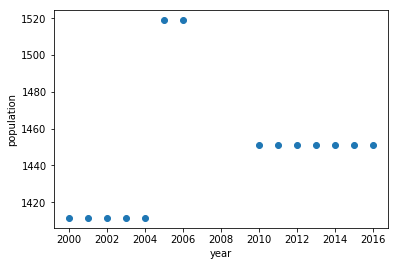

In [51]:
plt.scatter(years,by_year.mean()['population'].as_matrix())
plt.xlabel("year")
plt.ylabel('population')

Text(0,0.5,'poverty-rate')

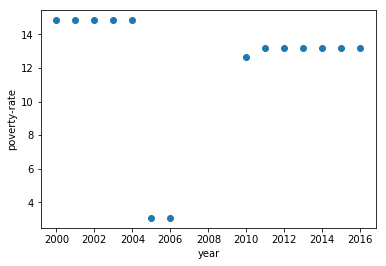

In [52]:
plt.scatter(years,by_year.mean()['poverty-rate'].as_matrix())
plt.xlabel("year")
plt.ylabel('poverty-rate')

Text(0,0.5,'pct-renter-occupied')

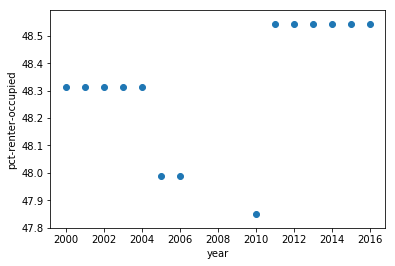

In [53]:
plt.scatter(years,by_year.mean()['pct-renter-occupied'].as_matrix())
plt.xlabel("year")
plt.ylabel('pct-renter-occupied')

Text(0,0.5,'median-gross-rent')

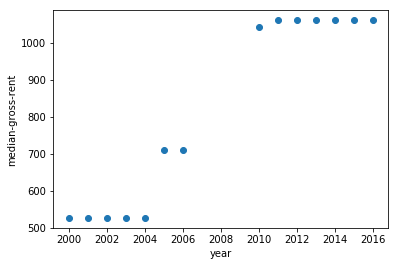

In [54]:
plt.scatter(years,by_year.mean()['median-gross-rent'].as_matrix())
plt.xlabel("year")
plt.ylabel('median-gross-rent')

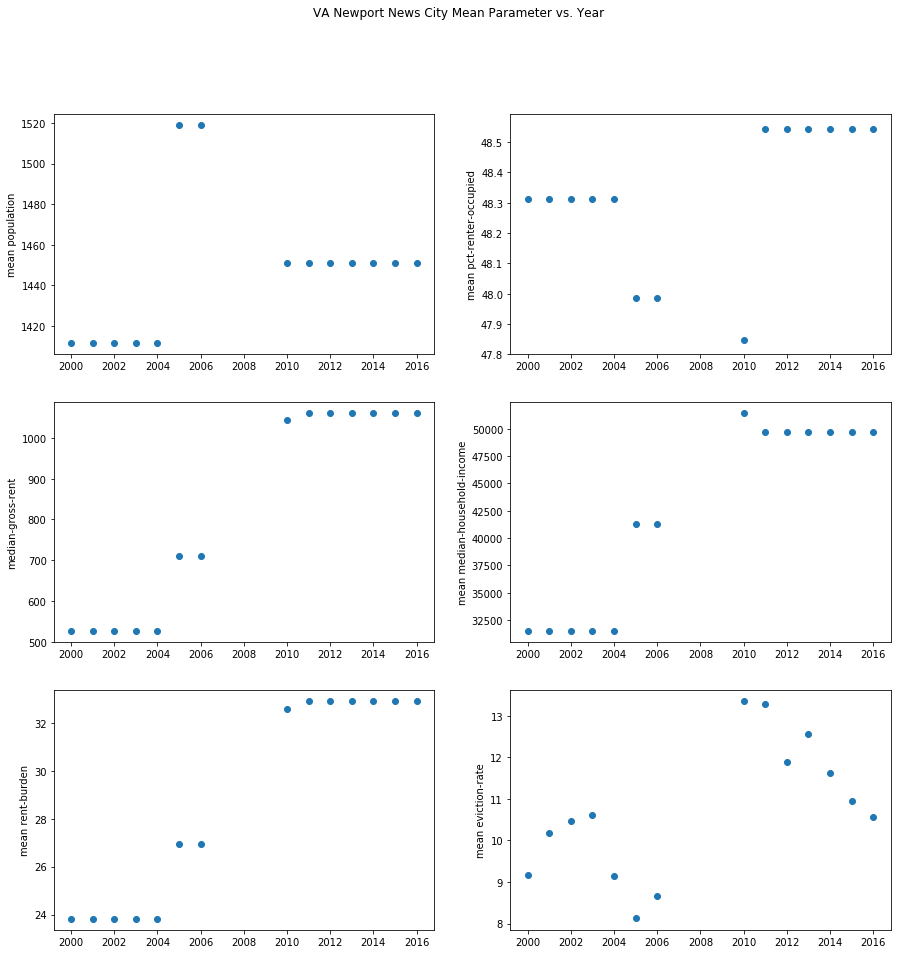

In [55]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15,15))

fig.suptitle('VA Newport News City Mean Parameter vs. Year')

ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

ax0.scatter(years,by_year.mean()['population'].as_matrix())
ax0.set_ylabel('mean population')

ax1.scatter(years,by_year.mean()['pct-renter-occupied'].as_matrix())
ax1.set_ylabel('mean pct-renter-occupied')

ax2.scatter(years,by_year.mean()['median-gross-rent'].as_matrix())
ax2.set_ylabel('median-gross-rent')

ax3.scatter(years,by_year.mean()['median-household-income'].as_matrix())
ax3.set_ylabel('mean median-household-income')

ax4.scatter(years,by_year.mean()['rent-burden'].as_matrix())
ax4.set_ylabel('mean rent-burden')

ax5.scatter(years,by_year.mean()['eviction-rate'].as_matrix())
ax5.set_ylabel('mean eviction-rate')

fig.savefig('Fig_VA_NewportNewsCity_YearMean.jpg')